# Create project

## Import

In [1]:
%matplotlib inline

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyiron import Project, Atoms
from scipy.optimize import minimize

In [3]:
import warnings  # ignore Lammps warnings 
warnings.filterwarnings("ignore")

## Clean up

In [4]:
pr = Project('fitting')
pr.remove_jobs_silently(recursive=True)

In [5]:
pr = Project('dft')
pr.remove_jobs_silently(recursive=True)

# Get fitting data 

## Create S/PHI/nX DFT calculation 

### Setup S/PHI/nX

In [6]:
job_vasp = pr.create_job(job_type=pr.job_type.Sphinx, job_name='sphinx')

In [7]:
job_vasp.structure = pr.create_ase_bulk('Al')

### Calculate Murnaghan 

In [8]:
murn = job_vasp.create_job(job_type=pr.job_type.Murnaghan, job_name='murn')

In [9]:
murn.run()

The job murn was saved and received the ID: 1
The job strain_0_9 was saved and received the ID: 2
The job strain_0_92 was saved and received the ID: 3
The job strain_0_94 was saved and received the ID: 4
The job strain_0_96 was saved and received the ID: 5
The job strain_0_98 was saved and received the ID: 6
The job strain_1_0 was saved and received the ID: 7
The job strain_1_02 was saved and received the ID: 8
The job strain_1_04 was saved and received the ID: 9
The job strain_1_06 was saved and received the ID: 10
The job strain_1_08 was saved and received the ID: 11
The job strain_1_1 was saved and received the ID: 12
job_id:  2 finished
job_id:  3 finished
job_id:  4 finished
job_id:  5 finished
job_id:  6 finished
job_id:  7 finished
job_id:  8 finished
job_id:  9 finished
job_id:  10 finished
job_id:  11 finished
job_id:  12 finished


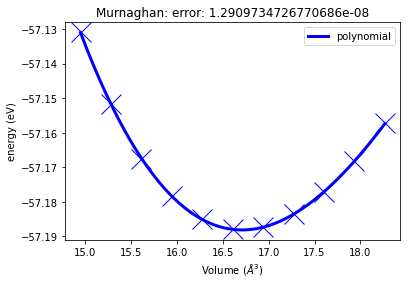

In [10]:
murn.plot()

### Overview 

In [11]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,Al,murn,/murn,/home/jovyan/,dft/,2020-11-26 16:12:41.099156,2020-11-26 16:13:17.615643,36.0,pyiron@jupyter-jan-2djanssen-2dpyi-2dfitting-2dexample-2dxeerobsg#1#11/11,Murnaghan,0.3.0,None,NaN
1,2,finished,Al,strain_0_9,/strain_0_9,/home/jovyan/,dft/murn_hdf5/,2020-11-26 16:12:42.135711,2020-11-26 16:12:44.514669,2.0,pyiron@jupyter-jan-2djanssen-2dpyi-2dfitting-2dexample-2dxeerobsg#1,Sphinx,2.6.1,None,1.0
2,3,finished,Al,strain_0_92,/strain_0_92,/home/jovyan/,dft/murn_hdf5/,2020-11-26 16:12:45.236697,2020-11-26 16:12:47.574704,2.0,pyiron@jupyter-jan-2djanssen-2dpyi-2dfitting-2dexample-2dxeerobsg#1,Sphinx,2.6.1,None,1.0
3,4,finished,Al,strain_0_94,/strain_0_94,/home/jovyan/,dft/murn_hdf5/,2020-11-26 16:12:48.184230,2020-11-26 16:12:50.719329,2.0,pyiron@jupyter-jan-2djanssen-2dpyi-2dfitting-2dexample-2dxeerobsg#1,Sphinx,2.6.1,None,1.0
4,5,finished,Al,strain_0_96,/strain_0_96,/home/jovyan/,dft/murn_hdf5/,2020-11-26 16:12:51.392316,2020-11-26 16:12:54.031975,2.0,pyiron@jupyter-jan-2djanssen-2dpyi-2dfitting-2dexample-2dxeerobsg#1,Sphinx,2.6.1,None,1.0
5,6,finished,Al,strain_0_98,/strain_0_98,/home/jovyan/,dft/murn_hdf5/,2020-11-26 16:12:54.622481,2020-11-26 16:12:57.226812,2.0,pyiron@jupyter-jan-2djanssen-2dpyi-2dfitting-2dexample-2dxeerobsg#1,Sphinx,2.6.1,None,1.0
6,7,finished,Al,strain_1_0,/strain_1_0,/home/jovyan/,dft/murn_hdf5/,2020-11-26 16:12:57.823109,2020-11-26 16:13:00.523427,2.0,pyiron@jupyter-jan-2djanssen-2dpyi-2dfitting-2dexample-2dxeerobsg#1,Sphinx,2.6.1,None,1.0
7,8,finished,Al,strain_1_02,/strain_1_02,/home/jovyan/,dft/murn_hdf5/,2020-11-26 16:13:01.112104,2020-11-26 16:13:03.739036,2.0,pyiron@jupyter-jan-2djanssen-2dpyi-2dfitting-2dexample-2dxeerobsg#1,Sphinx,2.6.1,None,1.0
8,9,finished,Al,strain_1_04,/strain_1_04,/home/jovyan/,dft/murn_hdf5/,2020-11-26 16:13:04.356649,2020-11-26 16:13:07.025186,2.0,pyiron@jupyter-jan-2djanssen-2dpyi-2dfitting-2dexample-2dxeerobsg#1,Sphinx,2.6.1,None,1.0
9,10,finished,Al,strain_1_06,/strain_1_06,/home/jovyan/,dft/murn_hdf5/,2020-11-26 16:13:07.624709,2020-11-26 16:13:10.457258,2.0,pyiron@jupyter-jan-2djanssen-2dpyi-2dfitting-2dexample-2dxeerobsg#1,Sphinx,2.6.1,None,1.0


# Fit potential 

## Collect S/PHI/nX calculation 

### Setup pyiron table

In [12]:
pr_fit = Project('fitting')

In [13]:
pyiron_table = pr_fit.create_job(job_type=pr_fit.job_type.TableJob, job_name='analysis')

In [14]:
pyiron_table.analysis_project = pr

In [15]:
pyiron_table.add.get_structure
pyiron_table.add.get_energy_tot
pyiron_table.add.get_forces
pyiron_table.add.get_job_name

True

In [16]:
pyiron_table.filter_function = pyiron_table.filter.job_type(pr.job_type.Sphinx)

In [17]:
pyiron_table.run()

  0%|          | 0/11 [00:00<?, ?it/s]

The job analysis was saved and received the ID: 13


100%|██████████| 11/11 [00:06<00:00,  1.66it/s]


### Summary

In [18]:
df_fit = pyiron_table.get_dataframe().sort_values(by='job_name')
df_fit

,job_name,job_id,energy_tot,structure,forces
0,strain_0_9,2,-57.130910,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 1.95511600430018, 1.95511600430018], [1.95511600430018, 0.0, 1.95511600430018], [1.95511600430018, 1.95511600430018, 0.0]], ""pbc""...","[[0.0, 0.0, -0.0]]"
1,strain_0_92,3,-57.151827,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 1.969492373259666, 1.969492373259666], [1.969492373259666, 0.0, 1.969492373259666], [1.969492373259666, 1.969492373259666, 0.0]],...","[[-0.0, -0.0, 0.0]]"
2,strain_0_94,4,-57.167532,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 1.9836618709720941, 1.9836618709720941], [1.9836618709720941, 0.0, 1.9836618709720941], [1.9836618709720941, 1.9836618709720941, ...","[[0.0, 0.0, -0.0]]"
3,strain_0_96,5,-57.178357,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 1.9976317789158857, 1.9976317789158857], [1.9976317789158857, 0.0, 1.9976317789158857], [1.9976317789158857, 1.9976317789158857, ...","[[0.0, 0.0, -0.0]]"
4,strain_0_98,6,-57.185143,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.011408986978327, 2.011408986978327], [2.011408986978327, 0.0, 2.011408986978327], [2.011408986978327, 2.011408986978327, 0.0]],...","[[0.0, 0.0, 0.0]]"
5,strain_1_0,7,-57.187896,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.0249999987473397, 2.0249999987473397], [2.0249999987473397, 0.0, 2.0249999987473397], [2.0249999987473397, 2.0249999987473397, ...","[[-0.0, -0.0, 0.0]]"
6,strain_1_02,8,-57.187192,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.0384109844292033, 2.0384109844292033], [2.0384109844292033, 0.0, 2.0384109844292033], [2.0384109844292033, 2.0384109844292033, ...","[[0.0, 0.0, -0.0]]"
7,strain_1_04,9,-57.183672,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.0516477914320985, 2.0516477914320985], [2.0516477914320985, 0.0, 2.0516477914320985], [2.0516477914320985, 2.0516477914320985, ...","[[0.0, 0.0, -0.0]]"
8,strain_1_06,10,-57.177226,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.0647159655331953, 2.0647159655331953], [2.0647159655331953, 0.0, 2.0647159655331953], [2.0647159655331953, 2.0647159655331953, ...","[[-0.0, -0.0, 0.0]]"
9,strain_1_08,11,-57.168323,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.0776207773375135, 2.0776207773375135], [2.0776207773375135, 0.0, 2.0776207773375135], [2.0776207773375135, 2.0776207773375135, ...","[[0.0, 0.0, 0.0]]"


## Fit lennard jones potential 

### Define Fit functions 

In [19]:
def set_structure_run_and_get_energy_and_forces(job, structure): 
    job.structure = structure 
    job.run()
    return job.output.energy_tot[-1], job.output.forces[-1] 

In [20]:
def get_potential(eps, sigma, cutoff=10.0):
    return pd.DataFrame({'Name': ['Al3ScLennardJones'],
                         'Filename': [[]],                             
                         'Model'   : ['LJ'], 
                         'Species' : [['Al']], 
                         'Config'  : [['pair_style lj/cut %f \n'%cutoff, 
                                       'pair_coeff 1 1 %.16f %.16f \n'%(eps, sigma)]]})

In [21]:
def compute_lj(job_lj, structure_lst, energy_lst, forces_lst, eps, sigma, cutoff=10.0, force_weight=0.1):
    method_dict['eps'].append(eps)
    method_dict['sigma'].append(sigma)
    job_lj.potential = get_potential(eps, sigma, cutoff)
    lj_energy_lst, lj_force_lst = zip(*[set_structure_run_and_get_energy_and_forces(job_lj, structure) for structure in structure_lst])
    total_loss = (np.linalg.norm(np.array(energy_lst) - np.array(lj_energy_lst))) + force_weight*np.linalg.norm(np.array(forces_lst) - np.array(lj_force_lst))
    method_dict['loss'].append(total_loss)
    return total_loss

In [22]:
def loss(initial_params): 
    eps, sigma = initial_params
    return compute_lj(job_lj=job_lj, 
                      structure_lst=structure_lst, 
                      energy_lst=energy_tot,
                      eps=eps, 
                      sigma=sigma, 
                      forces_lst=forces) 

### Datastructure 

In [23]:
method_dict = {'eps': [], 'sigma': [], 'loss': []}

In [24]:
energy_tot = df_fit.energy_tot.values
# energy_tot -= np.min(energy_tot)  # normalise to the equlibrium energy 
structure_lst = [Atoms(**json.loads(s)) for s in df_fit.structure.values]
forces = np.array([f for f in df_fit.forces.values])

### Run fitting 

In [25]:
job_lj = pr_fit.create_job(job_name='lj_fitting', job_type=pr_fit.job_type.Lammps)
job_lj.server.run_mode.interactive = True
job_lj.interactive_enforce_structure_reset = True

In [26]:
res = minimize(loss, [0.5, 2.5], method='Nelder-Mead')
res

The job lj_fitting was saved and received the ID: 14


 final_simplex: (array([[6.8808789 , 2.61153806],
       [6.88094969, 2.61152692],
       [6.88088342, 2.61154787]]), array([2.5504823 , 2.55048259, 2.55048266]))
           fun: 2.55048230195503
       message: 'Optimization terminated successfully.'
          nfev: 93
           nit: 49
        status: 0
       success: True
             x: array([6.8808789 , 2.61153806])

In [27]:
res.success

True

In [28]:
eps_final, sigma_final = res.x 

In [29]:
job_lj.interactive_close()

### Plots 

Text(0.5, 0, 'iteration')

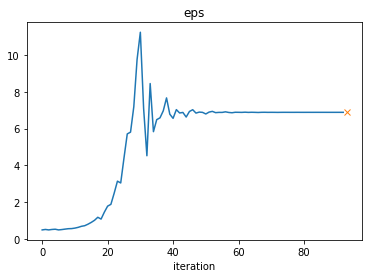

In [30]:
plt.plot(method_dict['eps'])
plt.plot([len(method_dict['eps'])], [eps_final], 'x')
plt.title('eps')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

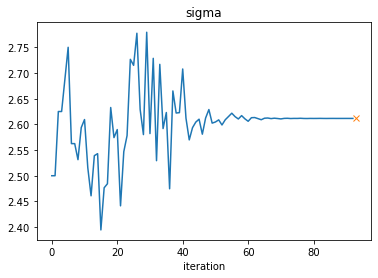

In [31]:
plt.plot(method_dict['sigma'])
plt.plot([len(method_dict['sigma'])], [sigma_final], 'x')
plt.title('sigma')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

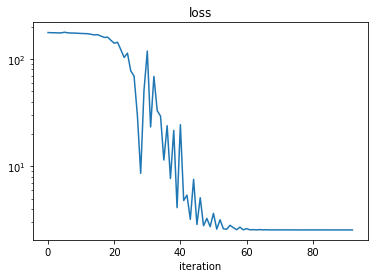

In [32]:
plt.plot(method_dict['loss'])
plt.title('loss')
plt.yscale('log')
plt.xlabel('iteration')

### Validation 

In [33]:
job_lj = pr_fit.create_job(job_name='lj_validation', job_type=pr_fit.job_type.Lammps)
job_lj.server.run_mode.interactive = True
job_lj.interactive_enforce_structure_reset = True

In [34]:
job_lj.potential = get_potential(eps=eps_final, sigma=sigma_final, cutoff=10.0)

In [35]:
job_lj.structure = structure_lst[len(structure_lst)//2]

In [36]:
murn = job_lj.create_job(job_type=pr_fit.job_type.Murnaghan, job_name='murn')

In [37]:
murn.run()

The job murn was saved and received the ID: 15
The job murn_lj_validation was saved and received the ID: 16


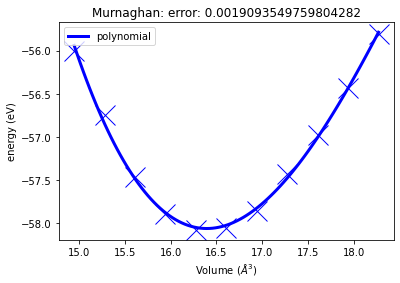

In [38]:
murn.plot()

# Debugging 

In [39]:
murn['output/energy']

array([-56.0023068 , -56.75126852, -57.47038345, -57.89661747,
       -58.0779605 , -58.05484816, -57.86141154, -57.4249091 ,
       -56.97675871, -56.43206305, -55.80840269])

In [40]:
energy_tot

array([-57.1309099 , -57.151827  , -57.16753246, -57.17835707,
       -57.18514332, -57.18789576, -57.18719156, -57.18367186,
       -57.17722623, -57.16832252, -57.15724997])

In [41]:
np.isclose(np.array([s.get_volume() for s in structure_lst]), murn['output/volume'])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])